# Quick start

Learn how to download an MNISQ data set and embed it in a quantum state with qiskit.

In [1]:
!pip install qiskit
!wget https://qulacs-quantum-datasets.s3.us-west-1.amazonaws.com/base_test_mnist_784_f90.zip
!unzip base_test_mnist_784_f90.zip

  Using cached qiskit-0.43.1.tar.gz (9.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached qiskit_ibmq_provider-0.20.2-py3-none-any.whl (241 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 64.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 57.5 MB/s eta 0:00:00
  Using cached ntlm_auth-1.5.0-py2.py3-none-any.whl (29 kB)
  Created wheel for qiskit: filename=qiskit-0.43.1-py3-none-any.whl size=8029 sha256=d0dd760e4f4416d8dcf39f641f4183daaeab76ff3c9963e4884e9b01e7aecac9
  Stored in directory: /home/tmori/.cache/pip/wheels/f1/f6/ad/0f2527d2cc0028cd682619f1b50a24476fd3592e0c63f87282
Successfully built qiskit
  Attempting 

This dataset contains the following information:
- `state`: Amplitude-encoded quantum state from original data
- `circuit`: `state` with a finite number of two-qubit density operators
- `qasm`: QASM representation of `circuit`
- `fidelity`: the square of the inner product of the quantum state created from `state`
-`label`: label

Let's look at 5 sheets of information from the dataset.

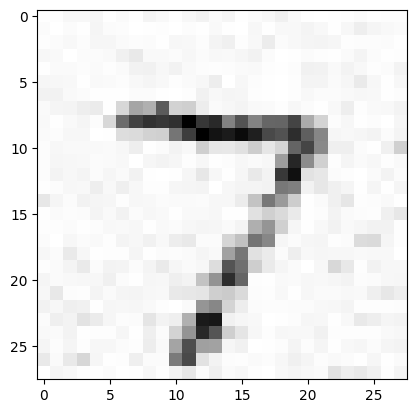

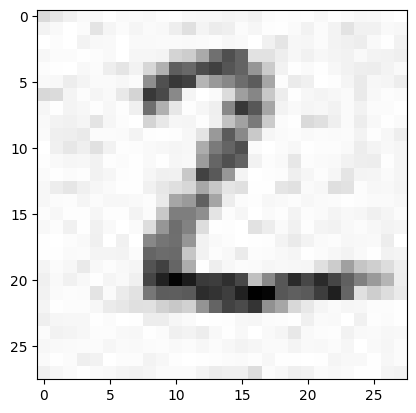

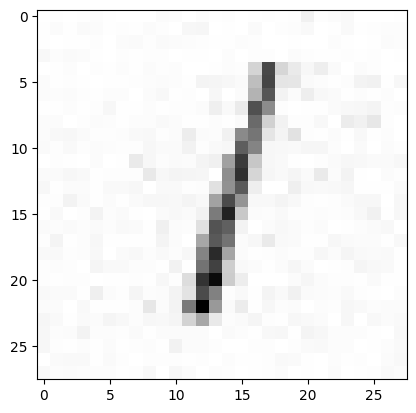

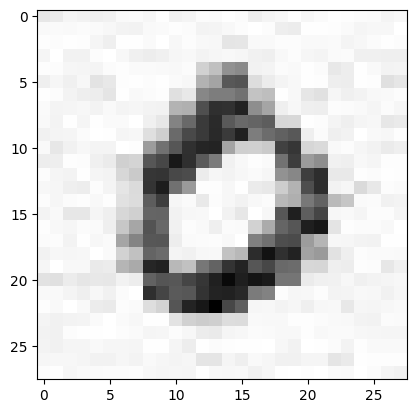

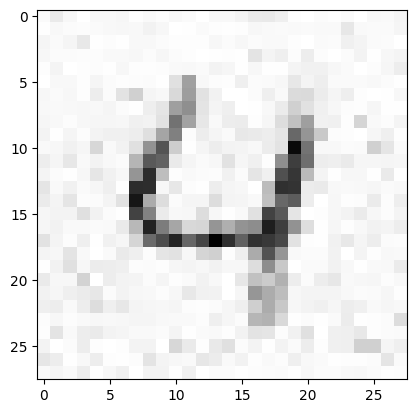

In [4]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import matplotlib.pyplot as plt

path = "base_test_mnist_784_f90/qasm/"

def show_figure(pict: np.array):
    plt.imshow(pict.reshape(28, 28), cmap="Greys")
    plt.show()

def show_state_figure(state):
    pict = state
    result = []
    for x in range(28 * 28):
        result.append(abs(pict[x]))
    show_figure(np.array(result))

for i in range(5):
    with open(path + str(i)) as f:
        qasm = f.read()
        qc = QuantumCircuit.from_qasm_str(qasm)
        backend = Aer.get_backend("statevector_simulator")
        job = execute(qc, backend)
        result = job.result()
        state = result.get_statevector(qc)
        show_state_figure(state)
